In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [27]:
df.shape

(48895, 16)

In [28]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [29]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [30]:
df[['price', 'minimum_nights', 'availability_365']].describe()

,price,minimum_nights,availability_365
count,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,112.781327
std,240.154170,20.510550,131.622289
min,0.000000,1.000000,0.000000
25%,69.000000,1.000000,0.000000
50%,106.000000,3.000000,45.000000
75%,175.000000,5.000000,227.000000
max,10000.000000,1250.000000,365.000000


In [31]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [32]:
# Fill reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# Drop rows with missing name or host_name
df.dropna(subset=['name', 'host_name'], inplace=True)


In [33]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [34]:
text_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']

for col in text_cols:
    df[col] = df[col].str.lower().str.strip()
text_cols

['neighbourhood_group', 'neighbourhood', 'room_type']

In [35]:
df[['neighbourhood_group', 'neighbourhood', 'room_type']].head()


,neighbourhood_group,neighbourhood,room_type
0,brooklyn,kensington,private room
1,manhattan,midtown,entire home/apt
2,manhattan,harlem,private room
3,brooklyn,clinton hill,entire home/apt
4,manhattan,east harlem,entire home/apt


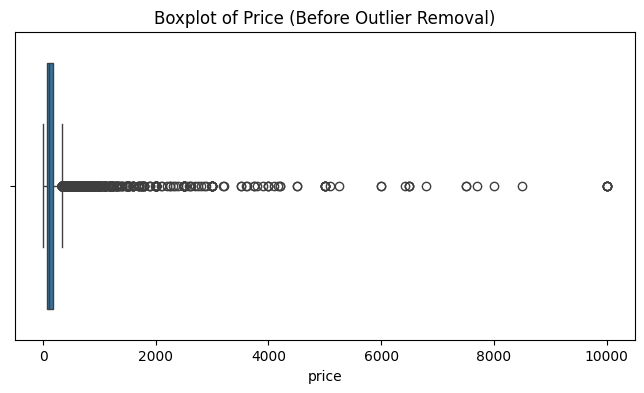

In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price (Before Outlier Removal)")
plt.show()


In [37]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['price'] >= Q1 - 1.5*IQR) &
        (df['price'] <= Q3 + 1.5*IQR)]


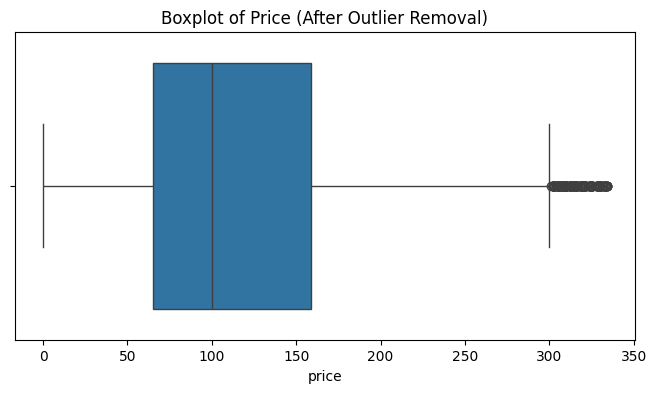

In [38]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price (After Outlier Removal)")
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45887 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45887 non-null  int64  
 1   name                            45887 non-null  object 
 2   host_id                         45887 non-null  int64  
 3   host_name                       45887 non-null  object 
 4   neighbourhood_group             45887 non-null  object 
 5   neighbourhood                   45887 non-null  object 
 6   latitude                        45887 non-null  float64
 7   longitude                       45887 non-null  float64
 8   room_type                       45887 non-null  object 
 9   price                           45887 non-null  int64  
 10  minimum_nights                  45887 non-null  int64  
 11  number_of_reviews               45887 non-null  int64  
 12  last_review                     36889

In [41]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.588700e+04,4.588700e+04,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000,45887.000000
mean,1.890467e+07,6.633702e+07,40.728479,-73.950734,119.970907,6.940985,23.941225,1.107956,6.643842,109.402859
std,1.091919e+07,7.757072e+07,0.055329,0.046474,68.145438,19.864844,45.314776,1.612643,31.019948,130.270561
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.445691e+06,7.719674e+06,40.689230,-73.981925,65.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,1.953052e+07,3.028359e+07,40.721770,-73.954370,100.000000,2.000000,5.000000,0.380000,1.000000,40.000000
75%,2.891607e+07,1.055431e+08,40.763385,-73.934325,159.000000,5.000000,24.000000,1.620000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [43]:
df.to_csv("AB_NYC_2019_CLEANED.csv", index=False)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0.10,1,0
